<a href="https://colab.research.google.com/github/Akita20/Linear-Regression/blob/main/New_York_Airbinb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Import the data
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


NameError: name 'kde' is not defined

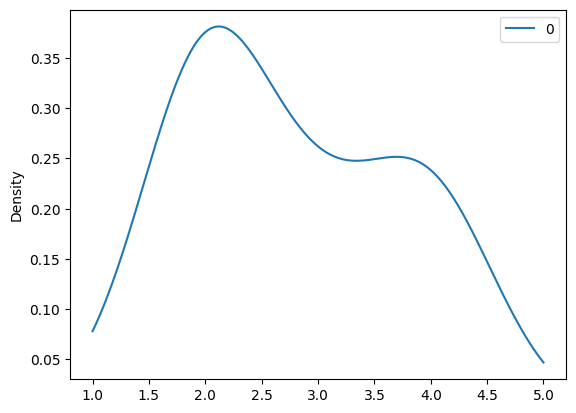

In [4]:
a= [4,4,4,3,3,2,2,2,2,2]
# plt.hist(a)
b = pd.DataFrame(a)
b.plot(kind='kde')
plt.savefig(kde-sample.png)

<Axes: ylabel='Density'>

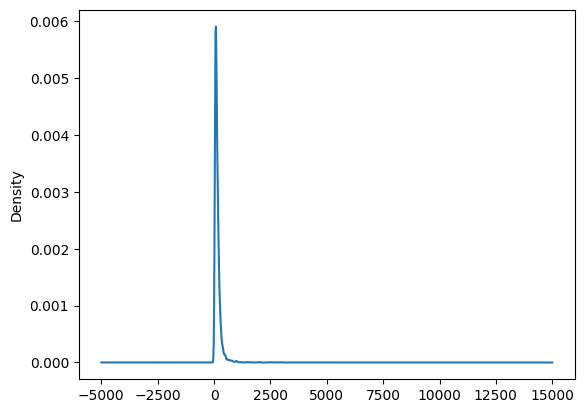

In [5]:
df['price'].plot(kind='kde')

Text(0.5, 0, 'price')

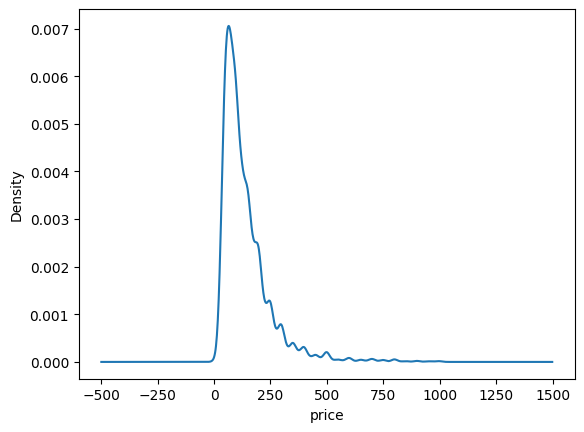

In [9]:
df[df['price']<1000]['price'].plot(kind='kde')
plt.xlabel('price')

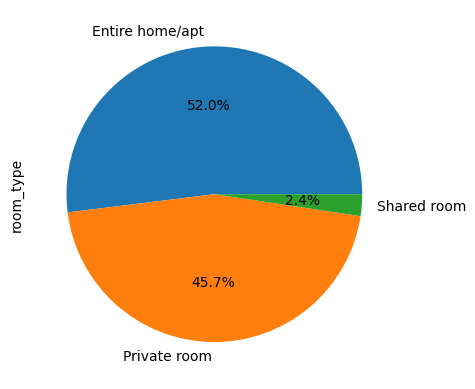

In [21]:

room_type_counts = df['room_type'].value_counts()
room_type_counts.plot(kind='pie', autopct='%1.1f%%')

# Add legend and grid
# room_type_counts.legend()
# room_type_counts.grid(True)
plt.show()

In [22]:
!pip install geopandas

In [24]:
import geopandas as gpd
# load the boundraries of NYU borought
url = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON"
nyc_boroughs= gpd.read_file(url)

In [25]:
nyc_boroughs.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623620725.05,325917.35395,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1,Manhattan,636520502.758,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2,Bronx,1187174772.5,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3,Brooklyn,1934138215.76,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041418506.64,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


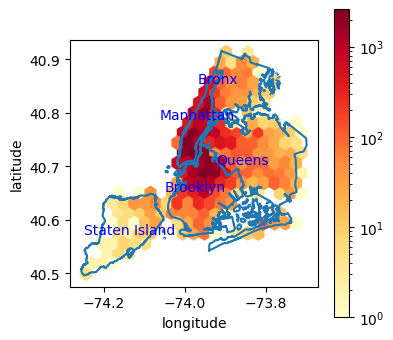

In [55]:
fig, ax = plt.subplots(figsize=(4,4))
df.plot(kind= 'hexbin',
                  x ='longitude',
                  y = 'latitude',
                  cmap='YlOrRd',
                  mincnt = 1,
                  gridsize= 20,
                  bins= 'log',
                  ax = ax)

nyc_boroughs.boundary.plot(ax=ax)

for x,y, label in zip(nyc_boroughs['rep_point'].x,nyc_boroughs['rep_point'].y,nyc_boroughs['boro_name']):
  plt.annotate(label, xy=(x,y),xytext=(-30,0), textcoords='offset points',color='blue')

In [42]:
nyc_boroughs['rep_point']=nyc_boroughs['geometry'].representative_point()

In [43]:
nyc_boroughs['boro_name']

0    Staten Island
1        Manhattan
2            Bronx
3         Brooklyn
4           Queens
Name: boro_name, dtype: object

In [44]:
nyc_boroughs['rep_point'].x

0   -74.145642
1   -73.960251
2   -73.866332
3   -73.948644
4   -73.819871
dtype: float64

In [45]:
nyc_boroughs['rep_point'].y

0    40.572491
1    40.788709
2    40.856072
3    40.654333
4    40.704093
dtype: float64

In [57]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


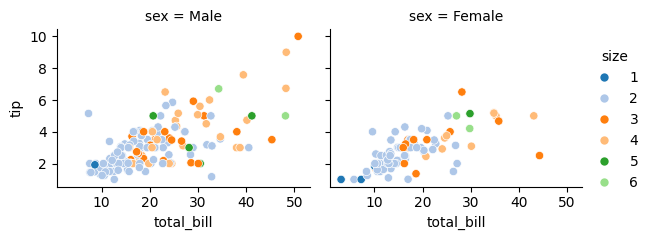

In [88]:
sns.relplot(data=tips.query('tip > 4 |tip < 6'),
            x='total_bill',
            y='tip',
            hue='size',
            col='sex',
            # row='smoker',
            palette='tab20',
            height =2.5,
            aspect=1.2)

In [67]:
new_tip=tips[((tips['tip'] >4) & (tips['tip']< 6))]

<ipython-input-83-8f9da5bdf64c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = tips,


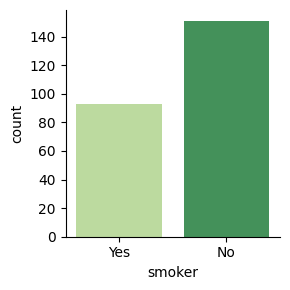

In [83]:
sns.catplot(data = tips,
            x= 'smoker',
            # y = 'total_bill',
            palette='YlGn',
            kind= 'count',
            height = 3)

<ipython-input-95-2675e4c99488>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = tips,


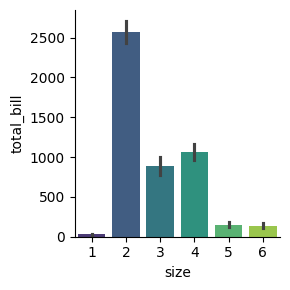

In [95]:
sns.catplot(data = tips,
            x= 'size',
            y = 'total_bill',
            palette='viridis',
            kind= 'bar',
            estimator= 'sum',
            height = 3)

In [82]:
# tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [102]:
tips.query('size==6')

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.2,Female,No,Thur,Lunch,6
141,34.30,6.7,Male,No,Thur,Lunch,6
143,27.05,5.0,Female,No,Thur,Lunch,6
156,48.17,5.0,Male,No,Sun,Dinner,6


<ipython-input-97-51038f7257f3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = tips,


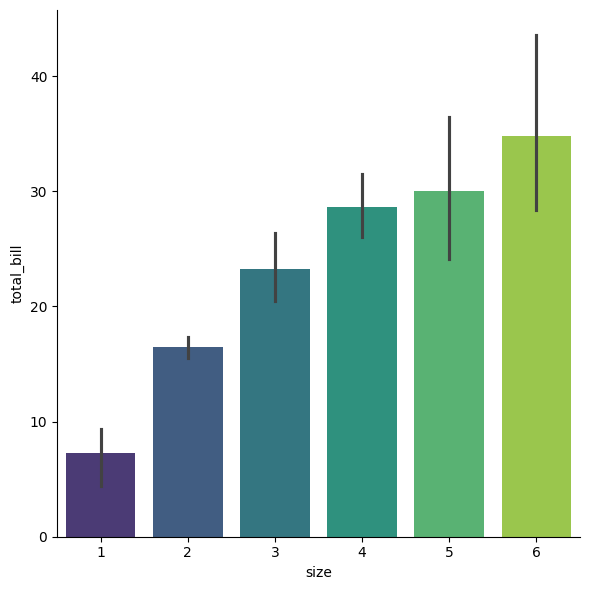

In [97]:
sns.catplot(data = tips,
            x= 'size',
            y = 'total_bill',
            palette='viridis',
            kind= 'bar',
            # estimator= 'sum',
            height = 6)

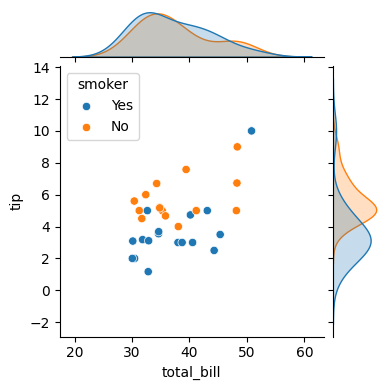

In [101]:
sns.jointplot(data = tips.query('total_bill >30'),
              x= 'total_bill',
              y = 'tip',
              hue='smoker',
              # palette='viridis',
              # kind= 'bar',
              # estimator= 'sum',
              height = 4
            )

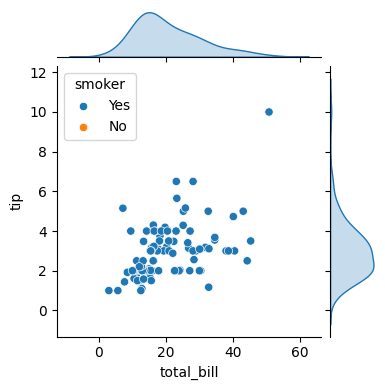

In [103]:
sns.jointplot(data = tips.query('smoker == "Yes"'),
              x= 'total_bill',
              y = 'tip',
              hue='smoker',
              height = 4
            )

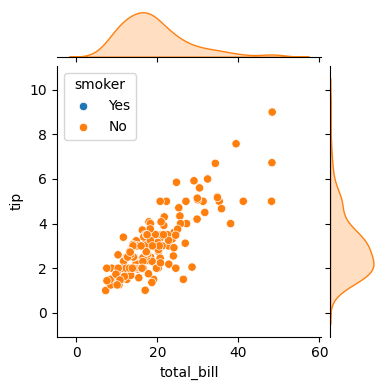

In [104]:
sns.jointplot(data = tips.query('smoker == "No"'),
              x= 'total_bill',
              y = 'tip',
              hue='smoker',
              height = 4
            )

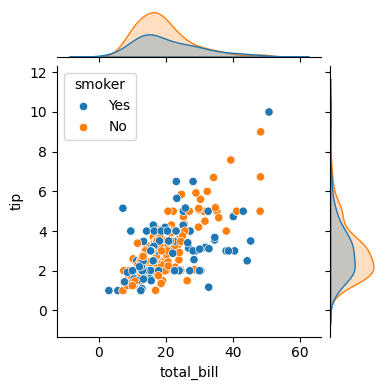

In [105]:
sns.jointplot(data = tips,
              x= 'total_bill',
              y = 'tip',
              hue='smoker',
              height = 4
            )